In [2]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('summary.simple.tsv', sep='\t')
df.head()

,sample_id,gene_name,est_counts,tpm
0,1,A1BG,89.513800,14.958630
1,1,A1CF,14.071500,0.249757
2,1,A2M,0.000000,0.000000
3,1,A2ML1,16.530498,1.209676
4,1,A2MP1,2.000000,0.076626


count    34832.000000
mean        28.709234
std        322.317076
min          0.000000
25%          0.000000
50%          0.351292
75%          6.132022
max      34001.600000
Name: tpm, dtype: float64

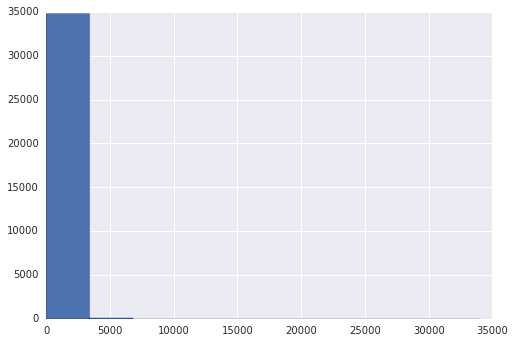

In [6]:
df.tpm.hist()
df.tpm.describe()

In [10]:
# get outliers (http://stackoverflow.com/a/31502974/130164)
df[((df.tpm - df.tpm.mean()) / df.tpm.std()).abs() > 3]

,sample_id,gene_name,est_counts,tpm
652,1,AC010970.2,57739.000000,4941.560000
3263,1,B2M,21168.996440,5608.715540
4933,1,CD37,6330.585960,1026.220960
4961,1,CD74,30023.531000,3931.504500
6902,1,CTD-2328D6.1,57188.000000,34001.600000
7623,1,DDX5,17003.512046,1783.898592
8395,1,EEF1A1,168208.951750,13238.381360
8436,1,EEF1B2,5446.606590,1159.599120
8445,1,EEF1D,5850.008080,1029.788427
8457,1,EEF1G,20726.848300,2088.411560


In [17]:
df=df[df['tpm']!=0]

In [21]:
df['logtpm'] = df.tpm.apply(np.log2)

count    20803.000000
mean         1.842364
std          3.299392
min        -26.707316
25%         -0.617152
50%          1.804184
75%          4.267305
max         15.053315
Name: logtpm, dtype: float64

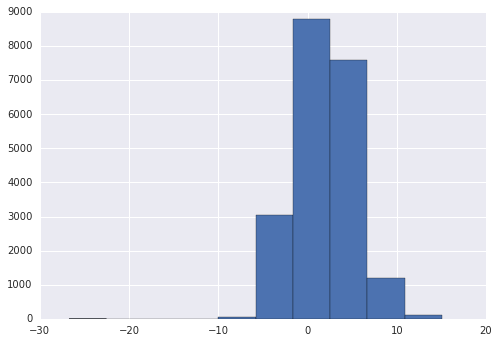

In [22]:
df.logtpm.hist()
df.logtpm.describe()

What we want to do:
Treat microarray and rnaseq data as two samples. How much does it look like they're the same phenotype?

* Do hierarchical clustering and see how it looks. Are patterns the same?
* Look for differentially expressed genes, see how many are different (shouldn't be many)
* Sort by most highly expressed transcripts in each sample. Compare ratio between expression of top two.


Apparently running voom transformation on RNAseq data enables treating it like microarray data, i.e. doing linear modeling and GSEA.